# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [59]:
df = pd.read_csv("car_data.csv")

In [60]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [12]:
df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [14]:
df.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [15]:
df.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [23]:
x = df["Mileage"]
x = x.to_frame()
y = df["Price"]


In [24]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [26]:
y_pred = linreg.predict(x)


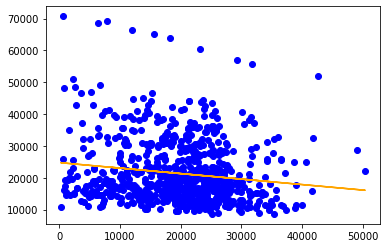

In [27]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, y_pred, color = 'orange')
plt.show()

In [30]:
r_sq = linreg.score(x, y)
print("r^2 value is: ",r_sq)

r^2 value is:  0.02046344732348926


In [32]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [57]:
df

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [61]:
df1 = df

In [67]:
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [71]:
x = df1.drop(['Price', 'Make', 'Model', 'Trim', 'Type'], axis = 1)

In [72]:
x.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1


In [73]:
y = df["Price"]

In [74]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [75]:
r_sq = linreg.score(x, y)
print("r^2 value is: ",r_sq)

r^2 value is:  0.4462643536728379


In [76]:
from itertools import combinations

# all possible columns for X
cols = [x for x in x.columns]
# define Y as same accross the loops
Y = df["Price"]
# define result dictionary
fit_d = {}

# loop for any length of combinations
for i in range(1, len(cols)+1):
    # loop for any combinations with length i
    for comb in combinations(cols, i):
        # Define X from the combination
        X = df[list(comb)]

        linreg = linear_model.LinearRegression()
        linreg.fit(X, Y)

        # save the rsquared in a dictionnary
        fit_d[comb] = linreg.score(X, Y)

# extract the key for the max R value
key_max = max(fit_d, key=fit_d.get)

In [77]:
sorted(fit_d.items(), key=lambda x:x[1], reverse=True)

[(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'),
  0.4462643536728379),
 (('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'),
  0.44569092105870245),
 (('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather'),
  0.437805741536638),
 (('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'), 0.4369402151237246),
 (('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather'),
  0.43014148406475594),
 (('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather'), 0.43001820483252684),
 (('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'),
  0.4265348637809262),
 (('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.4257681327974421),
 (('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'),
  0.42482840454267856),
 (('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound'),
  0.4244182401799875),
 (('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound'), 0.42409748258510405),
 (('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather'), 0.4225

In [78]:
print(f'Best variables {key_max} for a R2-value of {round(fit_d[key_max], 5)}')

Best variables ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') for a R2-value of 0.44626
